In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("mpg.csv")
df. sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
334,23.7,3,70.0,100,2420,12.5,80,3,mazda rx-7 gs
274,20.3,5,131.0,103,2830,15.9,78,2,audi 5000
187,17.5,8,305.0,140,4215,13.0,76,1,chevrolet chevelle malibu classic
17,21.0,6,200.0,85,2587,16.0,70,1,ford maverick
34,16.0,6,225.0,105,3439,15.5,71,1,plymouth satellite custom


<Axes: >

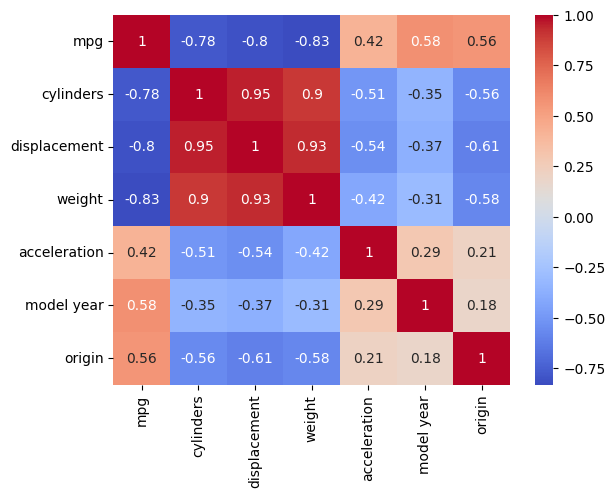

In [4]:
sns.heatmap(df.corr(numeric_only=True),
            annot=True, cmap="coolwarm")

<Axes: xlabel='mpg'>

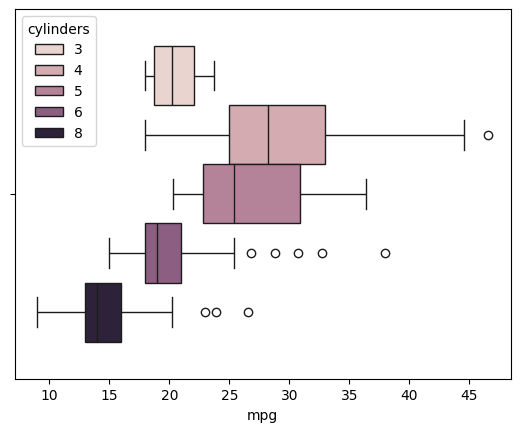

In [5]:
sns.boxplot(df, x="mpg", hue="cylinders")

In [7]:
#a tabela possuia dados inteiros vazios que estavam escritos com ?. Para trocar esses dados o codigo seria:
df = df.replace('?',pd.NA).dropna()
df['horsepower'] = df['horsepower'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 29.1+ KB


In [8]:
y = df['mpg']
X = df.drop(columns=['mpg', 'car name', 'origin'])

In [9]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [11]:
from sklearn.ensemble import RandomForestRegressor

consumo = RandomForestRegressor()
consumo.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
carro = X_test.sample(1)
carro


,cylinders,displacement,horsepower,weight,acceleration,model year
360,6,145.0,76,3160,19.6,81


In [14]:
consumo.predict(carro)

array([27.196])

In [15]:
y_test.sample(1, random_state=360)

22    25.0
Name: mpg, dtype: float64

In [16]:
import matplotlib.pyplot as plt

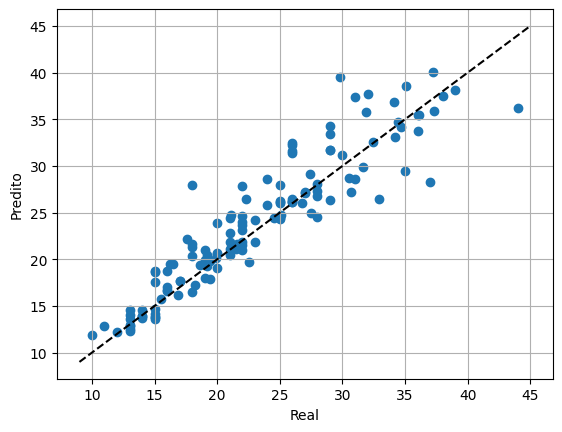

In [21]:
plt.scatter(y_test,consumo.predict(X_test))
plt.plot([9, 45],[9, 45], ls="--", c="k")
plt.xlabel("Real")
plt.ylabel("Predito")
plt.grid()

## $$\sqrt{\frac{(y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 + \Idots + (y_n - \hat{y}_n)^2|n}}

## $$ \sqrt{\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_1)^2}$$

## $$\sqrt{\frac{(y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 + \ldots + (y_n - \hat{y}_n)^2}{n}}$$

In [22]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, consumo.predict(X_test),squared=False)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2.903666713763026